In [1]:
from astropy.io import fits
import numpy as np

def reconstructPSF(psFieldFilename, filter, row, col):

    filterIdx = 'ugriz'.index(filter) + 1
    psField = fits.open(psFieldFilename)
    pStruct = psField[filterIdx].data

    nrow_b = pStruct['nrow_b'][0]
    ncol_b = pStruct['ncol_b'][0]

    rnrow = pStruct['rnrow'][0]
    rncol = pStruct['rncol'][0]

    nb = nrow_b * ncol_b
    coeffs = np.zeros(nb.size, float)
    ecoeff = np.zeros(3, float)
    cmat = pStruct['c']

    rcs = 0.001
    for ii in range(0, nb.size):
        coeffs[ii] = (row * rcs)**(ii % nrow_b) * (col * rcs)**(ii / nrow_b)

    for jj in range(0, 3):
        for ii in range(0, nb.size):
            ecoeff[jj] = ecoeff[jj] + cmat[int(ii / nrow_b), ii % nrow_b, jj] * coeffs[ii]

    psf = pStruct['rrows'][0] * ecoeff[0] + \
        pStruct['rrows'][1] * ecoeff[1] + \
        pStruct['rrows'][2] * ecoeff[2]

    psf = np.reshape(psf, (rnrow, rncol))
    # psf = psf[10:40, 10:40]  # Trim non-zero regions.

    return psf

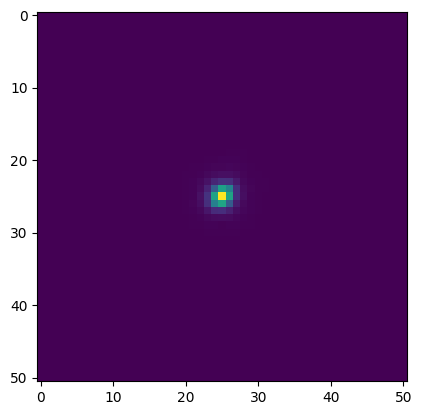

In [5]:
import matplotlib.pyplot as plt
plt.imshow(reconstructPSF(r"C:\Users\lenovo\Desktop\本研\psf\psField-005112-4-0224.fit","r",500,500))
plt.show()